In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, make_scorer

import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv('C:/Users/user/1/Downloads/Loan Approval/train.csv')
test_df = pd.read_csv('C:/Users/user/1/Downloads/Loan Approval/test.csv')

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

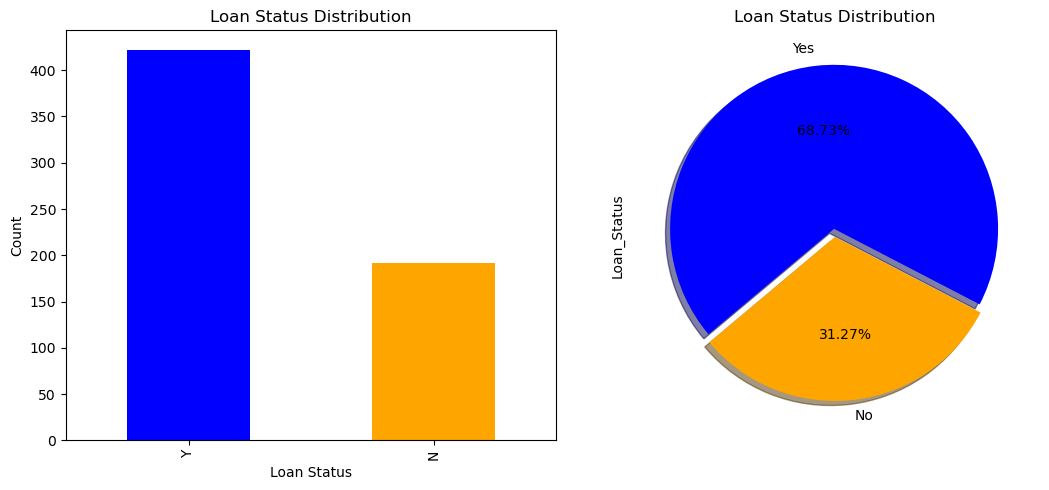

In [7]:
custom_palette = sns.color_palette(['blue', 'orange'])

plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
train_df['Loan_Status'].value_counts().plot.bar(color = custom_palette)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.subplot(1,2,2)
expand2 = [0.04,0.01]
labels = ['Yes','No']
train_df['Loan_Status'].value_counts().plot.pie(labels = labels,autopct = '%.2f%%',shadow = True,explode = expand2,
                                    counterclock = False,startangle =220, colors = custom_palette)
plt.title('Loan Status Distribution')
plt.tight_layout()
plt.show()

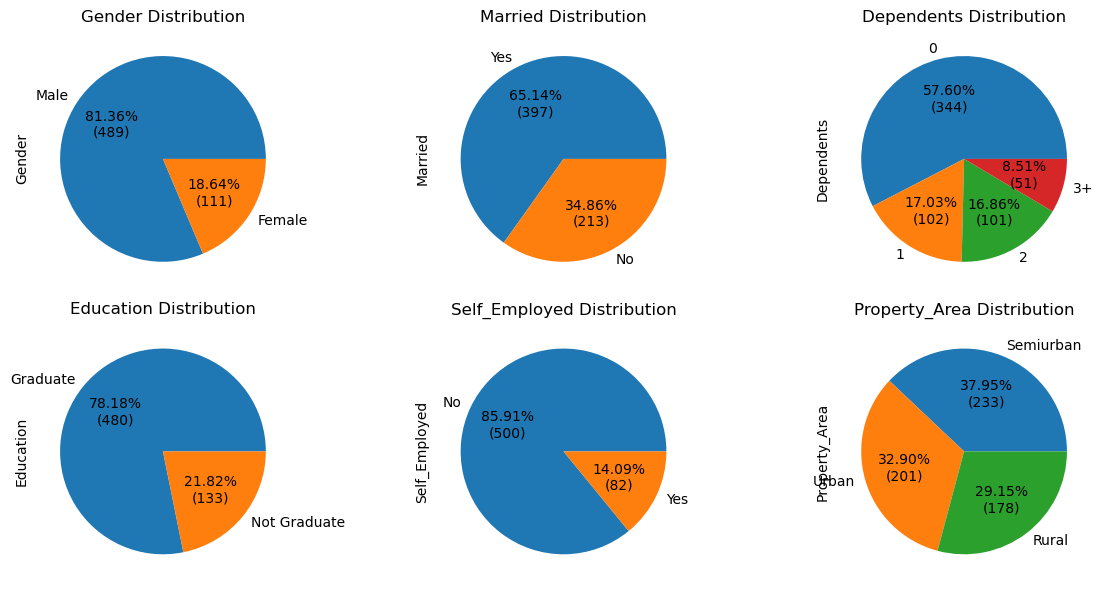

In [8]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(12, 6))
for i, col in enumerate(train_df[cols].columns, 1):
    plt.subplot(2, 3, i)
    counts = train_df[col].value_counts()
    counts.plot.pie(autopct=lambda p: f'{p:.2f}%\n({int(p * sum(counts) / 100)})')
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [10]:
nums = train_df.select_dtypes(['int','float'])
nums.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

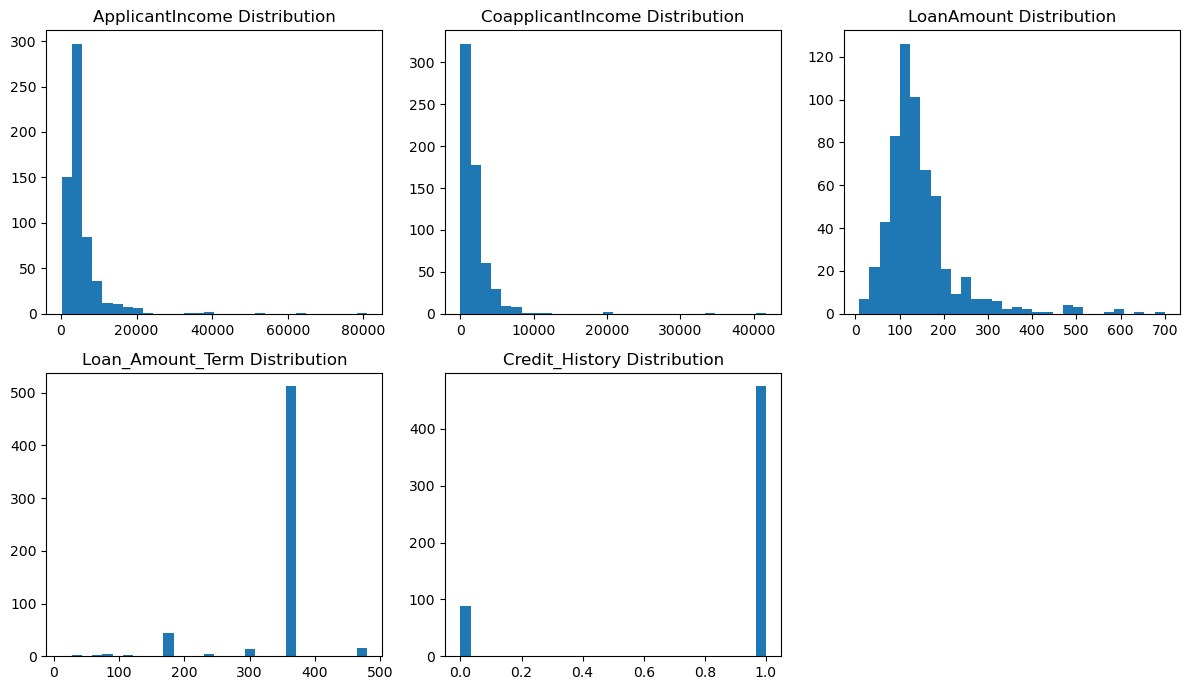

In [11]:
plt.figure(figsize=(12,7))
for i,col in enumerate(nums.columns, 1):
    plt.subplot(2,3,i)
    plt.hist(train_df[col], bins=30)
    plt.title(f'{col} Distribution')
    
plt.tight_layout()
plt.show()

### We obseve that there are outliers in many of the numeric variables. Additionally, the Credit_History feature seems to be categorical.

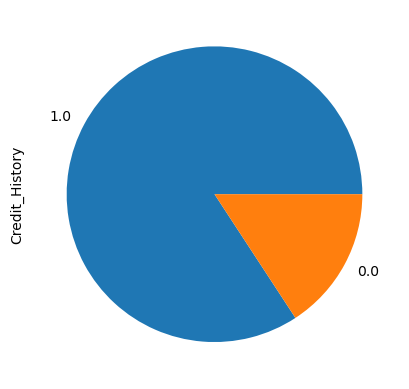

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
train_df['Credit_History'].value_counts().plot.pie()
plt.show()

train_df['Credit_History'].value_counts()

### As we suspected Credit_History feature is a binary variable, so we turn it from a float type into an int, in order to be handled more easily by the machine learning algorithms

## Training Set: Data Cleaning

In [13]:
train_df.drop('Loan_ID', axis=1, inplace=True)

In [14]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handing Null values

In [15]:
# Coapplicant_Income
train_df['CoapplicantIncome'] = train_df['CoapplicantIncome'].astype(int)

# Credit_History
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Credit_History'] = train_df['Credit_History'].astype(int)

# Dependents
train_df['Dependents'].fillna(train_df.Dependents.mode()[0], inplace=True)

# Self_Employed
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

# Married
train_df['Married'].fillna(train_df.Married.mode()[0], inplace=True)

# Gender
train_df['Gender'].fillna(train_df.Gender.mode()[0], inplace=True)

# LoanAmount
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

# LoanAmountTerm
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int32  
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 52.9+ KB


In [17]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128.0,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141.0,360.0,1,Urban,Y


### One Hot Encoding

In [18]:
# Gender
train_df['Gender'] = np.where(train_df['Gender']=='Male', 1, 0)

# Married
train_df['Married'] = np.where(train_df['Married']=='Yes', 1, 0)

# Self_Employed
train_df['Self_Employed'] = np.where(train_df['Self_Employed']=='Yes', 1, 0)

# Loan_Status
train_df['Loan_Status'] = np.where(train_df['Loan_Status']=='Y', 1, 0)

# Education
train_df['Education'] = np.where(train_df['Education']=='Graduate', 1, 0)

### Ordinal Encoding

In [19]:
# Dependents
category_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}

train_df['Dependents_Encoded'] = train_df['Dependents'].map(category_mapping)
train_df.loc[train_df['Dependents_Encoded'].isna(), 'Dependents_Encoded'] = 3

train_df['Dependents_Encoded'] = train_df['Dependents_Encoded'].astype(int)
train_df.drop('Dependents', axis=1, inplace=True)

In [20]:
train_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_Encoded
0,1,0,1,0,5849,0,128.0,360.0,1,Urban,1,0
1,1,1,1,0,4583,1508,128.0,360.0,1,Rural,0,1
2,1,1,1,1,3000,0,66.0,360.0,1,Urban,1,0
3,1,1,0,0,2583,2358,120.0,360.0,1,Urban,1,0
4,1,0,1,0,6000,0,141.0,360.0,1,Urban,1,0


In [21]:
train_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
encoded_df = pd.get_dummies(train_df['Property_Area'], prefix='Area')

train_df = pd.concat([train_df, encoded_df], axis=1)

train_df_cleaned = train_df.drop('Property_Area', axis=1)

In [23]:
train_df_cleaned.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_Encoded,Area_Rural,Area_Semiurban,Area_Urban
0,1,0,1,0,5849,0,128.0,360.0,1,1,0,0,0,1
1,1,1,1,0,4583,1508,128.0,360.0,1,0,1,1,0,0
2,1,1,1,1,3000,0,66.0,360.0,1,1,0,0,0,1
3,1,1,0,0,2583,2358,120.0,360.0,1,1,0,0,0,1
4,1,0,1,0,6000,0,141.0,360.0,1,1,0,0,0,1


## Data Analysis

In [24]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Education,614.0,0.781759,0.413389,0.0,1.00,1.0,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.244300,2926.248760,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.0


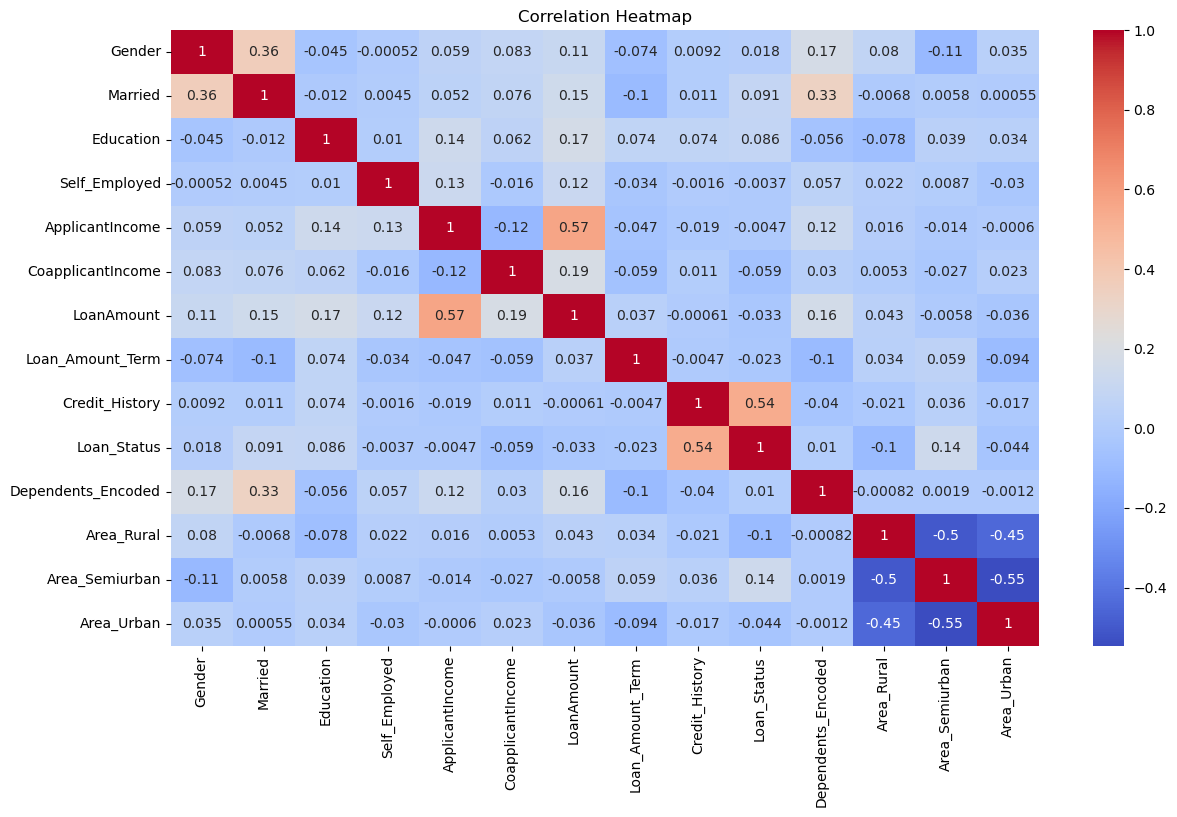

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
nums.drop('Credit_History', axis=1, inplace=True)

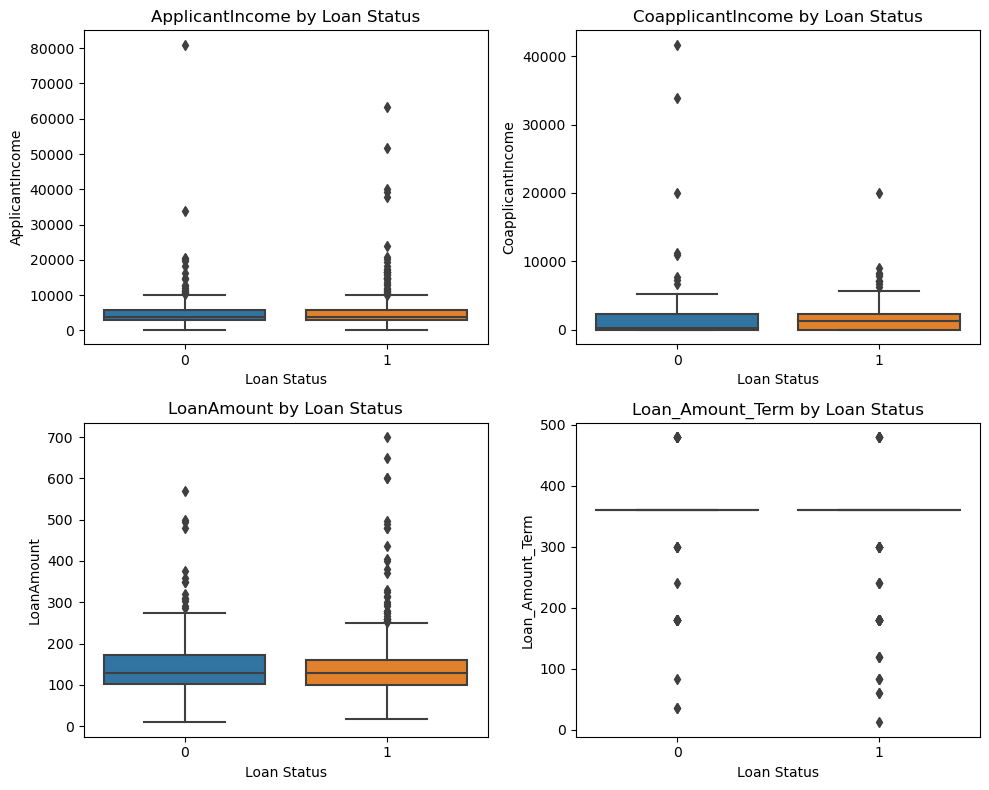

In [27]:
### Numeric Variables by Loan Stauts

plt.figure(figsize=(10,8))
for i, col in enumerate(nums.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df['Loan_Status'], y=train_df[col])
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Loan Status')

plt.tight_layout()
plt.show()

## Test Set: Data Cleaning 

In [28]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [29]:
test_df.shape

(367, 12)

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [31]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [32]:
test_df.drop('Loan_ID', axis=1, inplace=True)

### Handling Null values

In [33]:
# Gender
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)

# Married
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)

# Self_Employed
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)

# LoanAmount
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['LoanAmount'] = test_df['LoanAmount'].astype(int)

# Loan_Amount_Term
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median(), inplace=True)
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].astype(int)

# Credit_History
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Credit_History'] = test_df['Credit_History'].astype(int)

In [34]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100,360,1,Urban
4,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban


### One Hot Encoding

In [35]:
# Gender
test_df['Gender'] = np.where(test_df['Gender'] == 'Male', 1, 0)

# Married
test_df['Married'] = np.where(test_df['Married']=='Yes', 1, 0)

# Self_Employed
test_df['Self_Employed'] = np.where(test_df['Self_Employed']=='Yes', 1, 0)

# Education
test_df['Education'] = np.where(test_df['Education']=='Graduate', 1, 0)

In [36]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110,360,1,Urban
1,1,1,1,1,0,3076,1500,126,360,1,Urban
2,1,1,2,1,0,5000,1800,208,360,1,Urban
3,1,1,2,1,0,2340,2546,100,360,1,Urban
4,1,0,0,0,0,3276,0,78,360,1,Urban


### Ordinal Encoding

In [37]:
# Dependents
category_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}

test_df['Dependents_Encoded'] = test_df['Dependents'].map(category_mapping)
test_df.loc[train_df['Dependents_Encoded'].isna(), 'Dependents_Encoded'] = 3

test_df['Dependents_Encoded'] = test_df['Dependents_Encoded'].astype(int)
test_df.drop('Dependents', axis=1, inplace=True)

In [38]:
test_df['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [39]:
# Property_Area
encoded_df = pd.get_dummies(test_df['Property_Area'], prefix='Area')

test_df = pd.concat([test_df, encoded_df], axis=1)

test_df_cleaned = test_df.drop('Property_Area', axis=1)

# Machine Learning

In [40]:
X = train_df_cleaned.drop('Loan_Status', axis=1)
y = train_df_cleaned['Loan_Status']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)

## Logistic Regression

In [42]:
log = LogisticRegression()
log_reg = log.fit(X_train, y_train)

In [43]:
y_pred_train = log_reg.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {100*acc:.2f}%')

Training Accuracy: 80.89%


In [44]:
y_pred = log_reg.predict(X_test)

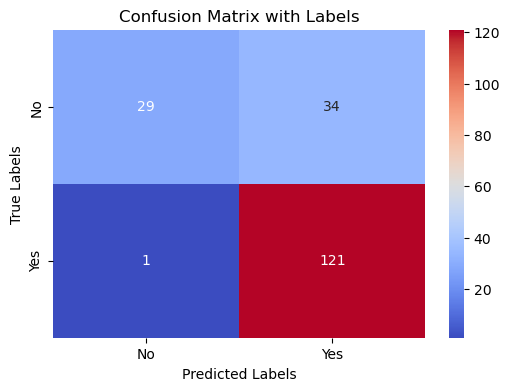

In [45]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['No','Yes']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [46]:
log_prec = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1_score = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {log_acc:.2f}%')
print(f'Precision: {log_prec:.2f}')
print(f'Recall: {log_recall:.2f}')
print(f'F1 Score: {log_f1_score:.2f}')

Accuracy: 0.81%
Precision: 0.78
Recall: 0.99
F1 Score: 0.87


### Precision 0.78 means that out of all the loan approvals predicted by the algorithm, only 78% of them were actually correct.

### Recall 0.99 means that out of all the actual loan approvals, the algorithm correctly identified 99% of them.

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.46      0.62        63
           1       0.78      0.99      0.87       122

    accuracy                           0.81       185
   macro avg       0.87      0.73      0.75       185
weighted avg       0.84      0.81      0.79       185



### In other words, the algorithm does a pretty good job finding the actual loan approvals but it's not perfect to reject the loans that should not been classified as valid

### Dream Housing Finance company wants to reduce the risk of the loan that gives to people as well, but don't want to reject people who meet the criteria to been approved for a loan. 

### That's why the metric we are interested in is F1-score

### The F1 score is a metric that combines both precision and recall into a single value. It's the harmonic mean of precision and recall

### $$ F1 score = \frac{2*Precision*Recall}{Precision+Recall} $$

### Consequently, we are going to maximize the F1 score, trying different values for thresholds in logistic regression

In [48]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    log = LogisticRegression()
    log_reg = log.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    probabilities = log_reg.predict_proba(X_test)[:, 1]
    
    predictions = (probabilities > threshold).astype(int)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
    
    f1score = f1_score(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f},  Precision: {precision:.2f},  Recall: {recall:.2f},  F1 Score: {f1score:.2f},  Accuracy: {acc:.2f}")    

Threshold: 0.10,  Precision: 0.67,  Recall: 1.00,  F1 Score: 0.80,  Accuracy: 0.67
Threshold: 0.20,  Precision: 0.72,  Recall: 0.99,  F1 Score: 0.83,  Accuracy: 0.74
Threshold: 0.30,  Precision: 0.75,  Recall: 0.99,  F1 Score: 0.86,  Accuracy: 0.78
Threshold: 0.40,  Precision: 0.77,  Recall: 0.99,  F1 Score: 0.86,  Accuracy: 0.79
Threshold: 0.50,  Precision: 0.78,  Recall: 0.99,  F1 Score: 0.87,  Accuracy: 0.81
Threshold: 0.60,  Precision: 0.80,  Recall: 0.87,  F1 Score: 0.83,  Accuracy: 0.77
Threshold: 0.70,  Precision: 0.84,  Recall: 0.66,  F1 Score: 0.74,  Accuracy: 0.69
Threshold: 0.80,  Precision: 0.84,  Recall: 0.48,  F1 Score: 0.61,  Accuracy: 0.59
Threshold: 0.90,  Precision: 0.87,  Recall: 0.21,  F1 Score: 0.34,  Accuracy: 0.46


### We conclude that the best threshold for logistic regression, given that our goal is to maximize the f1-score is the default threshold 0.5

### However, if someone wants to reduce the risk in the case of approving a 'bad' loan, increasing slightly the threshold would be a solid way to achieve that .

## Decision Trees

In [49]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train, y_train)

In [50]:
y_pred_train = tree_fit.predict(X_train)
training_error = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {training_error:.2f}')

Training Accuracy: 1.00


### In this case the decision tree model is overfitted. We are going to optimize the best pruning for our model in order to decrease the variance significantly

In [77]:
tree = DecisionTreeClassifier()

params = {'ccp_alpha':[0.001, 0.01, 0.1]}

grid_search=GridSearchCV(tree, param_grid=params, cv=5,
                       scoring='f1')

grid_search.fit(X, y)
print("Best parameters from gridsearch: {}".format(grid_search.best_params_))
print("CV score=%0.3f" % grid_search.best_score_)

Best parameters from gridsearch: {'ccp_alpha': 0.01}
CV score=0.877


In [78]:
tree = DecisionTreeClassifier()

params = {'ccp_alpha':[0.01, 0.02, 0.03, 0.04, 0.05]}

grid_search=GridSearchCV(tree, param_grid=params, cv=5,
                       scoring='f1')

grid_search.fit(X_train, y_train)
print("Best parameters from gridsearch: {}".format(grid_search.best_params_))
print("CV score=%0.3f" % grid_search.best_score_)


Best parameters from gridsearch: {'ccp_alpha': 0.02}
CV score=0.878


In [79]:
best_model = grid_search.best_estimator_

In [82]:
y_pred=best_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {tree_acc:.3f}')
tree_f1_score = f1_score(y_test, y_pred)
print(f'F1-Score: {tree_f1_score:.3f}')

Accuracy: 0.811
F1-Score: 0.874


## Random Forests

In [83]:
rf = RandomForestClassifier()

rf_fit = rf.fit(X_train, y_train)
y_pred_train = rf_fit.predict(X_train)
acc=accuracy_score(y_train, y_pred_train)
rf_f1_score = f1_score(y_train, y_pred_train)
print(f'Training Accuracy: {acc:.3f}')
print(f'Training F1-Score: {rf_f1_score:.3f}')

Training Accuracy: 1.000
Training F1-Score: 1.000


### The model suffers from overfitting in random forests algorithm too.

In [85]:
rf = RandomForestClassifier()

params_grid = {'n_estimators':[100, 200, 300],
               'max_depth': [3, 5, 7],
               'min_samples_split': [5, 10, 15],
               'bootstrap': [True, False]
               }

grid_search = GridSearchCV(rf, param_grid=params_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters from gridsearch: {}".format(grid_search.best_params_))
print("CV score=%0.3f" % grid_search.best_score_)

Best parameters from gridsearch: {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
CV score=0.879


In [86]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

forest_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {forest_acc:.3f}')

forest_f1_score = f1_score(y_test, y_pred)
print(f'F1-score: {forest_f1_score:.3f} ')

Accuracy: 0.811
F1-score: 0.874 


               Feature  Importance
8       Credit_History    0.477659
4      ApplicantIncome    0.124598
6           LoanAmount    0.101152
5    CoapplicantIncome    0.083894
7     Loan_Amount_Term    0.062427
11      Area_Semiurban    0.040218
10          Area_Rural    0.025830
9   Dependents_Encoded    0.023801
2            Education    0.018498
12          Area_Urban    0.017546
3        Self_Employed    0.009147
1              Married    0.008876
0               Gender    0.006354


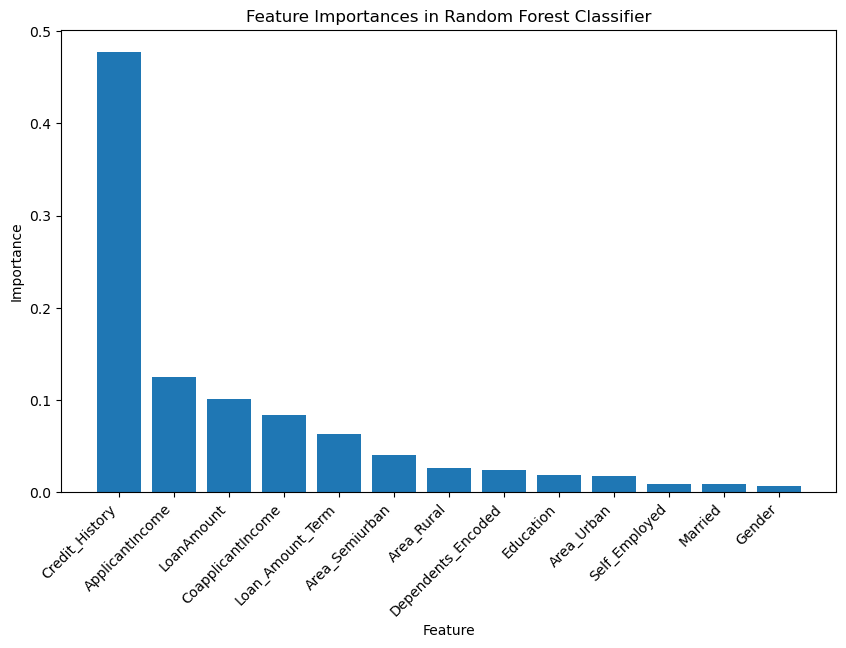

In [87]:
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()

### The most important feature in approving loans is 'Credit_History' with an importance score of approximately 48%.

## Gradient Boosting

In [93]:
grad = GradientBoostingClassifier()

grad_fit = grad.fit(X_train, y_train)
y_pred_train = grad_fit.predict(X_train)
grad_acc = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {grad_acc:.3f}')

Training Accuracy: 0.907


In [94]:
y_pred = grad_fit.predict(X_test)

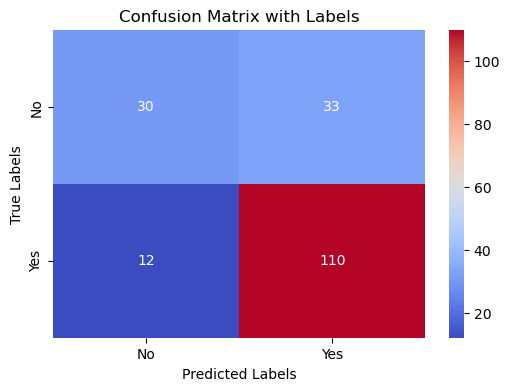

In [95]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['No','Yes']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57        63
           1       0.77      0.90      0.83       122

    accuracy                           0.76       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.76      0.74       185



In [103]:
grad_f1_score = f1_score(y_test, y_pred)
print(f'Gradient Boosting Classifier F1-Score: {grad_f1_score:.3f}')

grad_acc = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Classifier Accuracy: {grad_acc:.3f}')

Gradient Boosting Classifier F1-Score: 0.830
Gradient Boosting Classifier Accuracy: 0.757


### Hyperparameter Tuning

In [99]:
grad = GradientBoostingClassifier()

params_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.001, 0.01, 0.1],
              'min_samples_split':[2,3,4]}

grid_search = GridSearchCV(grad, param_grid=params_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters from gridsearch: {}".format(grid_search.best_params_))
print("CV score=%0.3f" % grid_search.best_score_)

Best parameters from gridsearch: {'learning_rate': 0.01, 'min_samples_split': 2, 'n_estimators': 100}
CV score=0.874


### GridSearch Cross Validation returns the initial model we had as the best model ,corresponding to the different parameters we chose to compare

## Models Comparison

In [104]:
accs = [log_acc, tree_acc, forest_acc, grad_acc]
f1_scores = [log_f1_score, tree_f1_score, forest_f1_score, grad_f1_score]
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting']

In [105]:
results_df = pd.DataFrame({'Model': models,'Accuracy': accs, 'F1 Score': f1_scores})
results_df.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,F1 Score
0,Logistic Regression,0.810811,0.873646
1,Decision Trees,0.810811,0.873646
2,Random Forests,0.810811,0.873646
3,Gradient Boosting,0.756757,0.830189


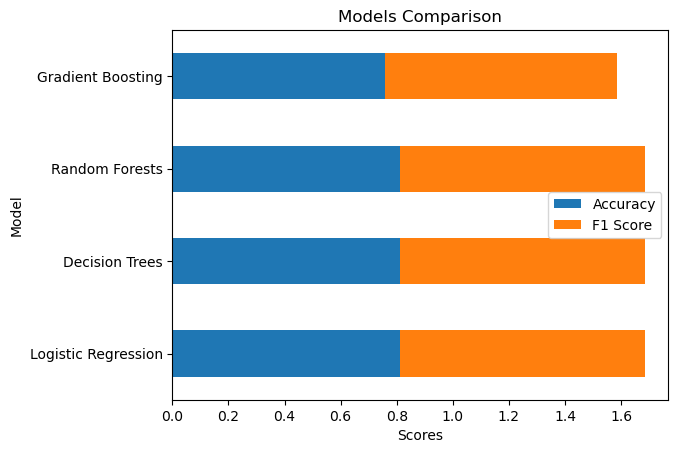

In [146]:
results_df.plot(x='Model', kind='barh', stacked=True,
        title='Models Comparison')
plt.xlabel('Scores')
plt.show()

### Apart from Gradient Boosting Classifier that has a lower f1-Score comparing to the other algorithms, the rest methods have approximately the same results. Since Logistic Regression has the best interpretability corresponding to Decision Trees and Random Forests we will use this method to train a Logistic Regression model using the whole dataset

In [147]:
log = LogisticRegression()
log_fit = log.fit(X, y)

In [148]:
test_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_Encoded,Area_Rural,Area_Semiurban,Area_Urban
0,1,1,1,0,5720,0,110,360,1,Urban,0,0,0,1
1,1,1,1,0,3076,1500,126,360,1,Urban,1,0,0,1
2,1,1,1,0,5000,1800,208,360,1,Urban,2,0,0,1
3,1,1,1,0,2340,2546,100,360,1,Urban,2,0,0,1
4,1,0,0,0,3276,0,78,360,1,Urban,0,0,0,1


In [149]:
final_predictions=log_fit.predict(test_df_cleaned)

In [150]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,